In [102]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

path_data = os.path.join(".", "ML_Lab6_Dataset.csv")

import builtins

def print(*args, **kwargs):
    kwargs['sep'] = ''
    return builtins.print(*args, **kwargs)
    
plt.rcParams['figure.figsize'] = (6, 4)
# Change to stix
plt.rcParams['font.family'] = 'STIXGeneral'

### Lab Task 1

In [103]:
"""
You have been provided with a dataset containing several feature columns. You will need to select any 3 of the feature columns to make your own dataset. The “Sale Price” is the label column. Load the dataset into your python program as NumPy arrays (Xtrain, ytrain). Print the datasets (you need to show any 5 rows of the datasets).
"""

# Load the dataset into your python program as NumPy arrays (Xtrain ,ytrain).
dataset = pd.read_csv(path_data)

X_train = dataset[["BsmtFinSF1", "BsmtUnfSF", "TotalBsmtSF"]].values
y_train = dataset["SalePrice"].values

# Print the arrays
print("X_train:")
print(X_train[:5].T)

print("\ny_train:")
print(y_train[:5])

X_train:
[[ 706  978  486  216  655]
 [ 150  284  434  540  490]
 [ 856 1262  920  756 1145]]

y_train:
[208500 181500 223500 140000 250000]


### Lab Task 2

In [104]:
"""
In the input matrix (Xtrain), use feature scaling to rescale the feature columns so that their values range from 0 to 1:

xnew = (xold - xmin) / (xmax - xmin) OR xnew = (xmax - xold) / (xmax - xmin)

You will use these rescaled values in the upcoming tasks. Print the rescaled dataset (you need to show any 5 rows of the datasets).
"""

def feature_scaling(X, axis=0):
    return (X - X.min(axis=axis)) / (X.max(axis=axis) - X.min(axis=axis))

X_train_scaled = feature_scaling(X_train)

print("Scaled X_train:")
print(X_train_scaled[:5].T)
print("\nMin: ", X_train_scaled.min(axis=0))
print("Max: ", X_train_scaled.max(axis=0))

Scaled X_train:
[[0.12508859 0.17328136 0.08610914 0.03827073 0.11605245]
 [0.06421233 0.12157534 0.18578767 0.23116438 0.20976027]
 [0.1400982  0.20654664 0.15057283 0.12373159 0.18739771]]

Min: [0. 0. 0.]
Max: [1. 1. 1.]


### Lab Task 3

In [105]:
"""
For linear regression, you will implement the following hypothesis:

h(x) = b + w1x1 + w2x2 + w3x3
 
The wj and b represent the weights while the xj represents the features. The feature number is denoted by j. The linear hypothesis h(x) is to be calculated for each training example and its difference with the label y of that training example will represent the loss. Initialize the weights and bias to random values between 0 and 1.

In this task, you will write a cost function that calculates the overall loss across a set of training examples:

cost_function(X, y)

The X and y are the features and labels of the training dataset. The function will return the cost value. The cost function is given in the manual.

The m is the number of the training examples in the dataset. Write the code for the cost function and implement it to print out the cost. Provide the code and all relevant screenshots of the final output."""


def hypothesis(X, w, b):
    return b + np.dot(X, w)


def cost_function(X, y, w, b):
    assert len(X) == len(y), "X and y must have the same length"

    m = len(X)
    J = 1 / (2 * m) * np.sum((hypothesis(X, w, b) - y) ** 2)
    
    return J

# Initialize the weights and bias to random values between 0 and 1.
w = np.random.rand(3)
b = np.random.rand(1)

# Verify the cost function
print("Random weights [w]: ", w)
print("Random bias [b]: ", b)
print("\nCost: ", cost_function(X_train_scaled, y_train, w, b))

Random weights [w]: [0.6558075  0.25762245 0.08439556]
Random bias [b]: [0.68222255]

Cost: 19519484388.230553


### Lab Task 4

In [106]:
"""
In this task, you will write a function that uses gradient descent to update the weight parameters:

gradient_descent(X, y, alpha)

The X and y are the features and labels of the training dataset, alpha is the learning rate which is a tuning hyperparameter. The gradient descent algorithm is given in the manual.
"""

def gradient_descent(X, y, w, b, alpha):
    m = len(X)
    w = w - alpha * (1 / m) * np.dot(X.T, (hypothesis(X, w, b) - y))
    b = b - alpha * (1 / m) * np.sum(hypothesis(X, w, b) - y)

    return w, b

# Verify the gradient descent function
print("Gradient descent: ")
print("\nUpdated weights [w]: ", gradient_descent(X_train_scaled, y_train, w, b, 0.01)[0])
print("Updated bias [b]: ", gradient_descent(X_train_scaled, y_train, w, b, 0.01)[1])

Gradient descent: 

Updated weights [w]: [167.65658008 471.78608726 348.16997614]
Updated bias [b]: [1808.00739613]


### Lab Task 5

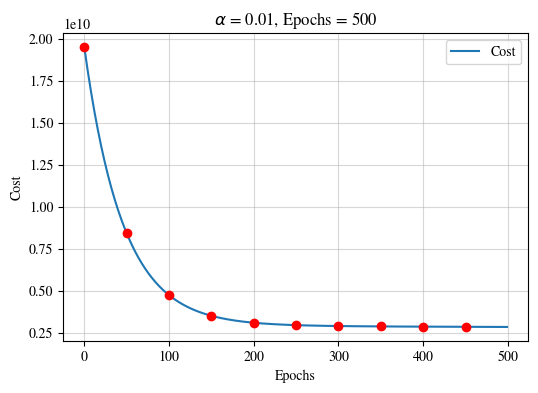

Final weights [w]: [25391.08746025 48079.07696333 43111.55664302]
Final bias [b]: [160025.43235297]


In [120]:
"""
In this task, you will use the functions from the previous two tasks to write a “main” function that performs the actual training. Use the cost function on the entire training dataset to determine the training loss. You will need to store this training loss for plater plotting. Next, use the gradient descent function to update the weights and bias. This iteration over the entire dataset is called an “epoch”. You will need to perform the training over several epochs (the epoch number is a hyperparameter you must select at the start of the training). Thus, you will compute training loss and weight update at each epoch. At the last epoch, note down the final weight values and plot the training loss (y-axis) over the epochs (x-axis). Provide the code (excluding function definitions of tasks 2 and 3) as well as all releveant screenshots of the final output.
"""

def main(X, y, alpha, epochs):
    # Initialize the weights and bias to random values between 0 and 1.
    w = np.random.rand(3)
    b = np.random.rand(1)

    # Initialize the cost array
    cost = []

    # Iterate over the epochs
    for epoch in range(epochs):
        # Compute the cost
        cost.append(cost_function(X, y, w, b))

        # Update the weights and bias
        w, b = gradient_descent(X, y, w, b, alpha)

    # Plot the cost
    plt.plot(cost)
    plt.plot(cost, marker="o", linestyle="none", color="red", markevery=50)
    plt.xlabel("Epochs")
    plt.ylabel("Cost")
    plt.title(f"$\\alpha$ = {alpha}, Epochs = {epochs}")
    plt.grid(alpha=0.5)
    plt.legend(["Cost"])
    plt.show()

    # Print the final weights and bias
    print("Final weights [w]: ", w)
    print("Final bias [b]: ", b)
    
main(X_train_scaled, y_train, 0.01, 500)

### Lab Task 6

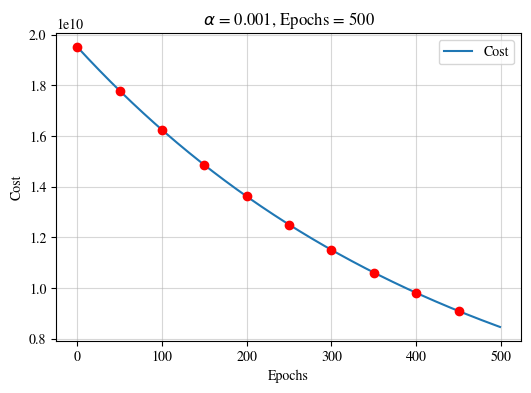

Final weights [w]: [ 6719.9849279  18309.2981076  13730.08354502]
Final bias [b]: [69523.54839578]


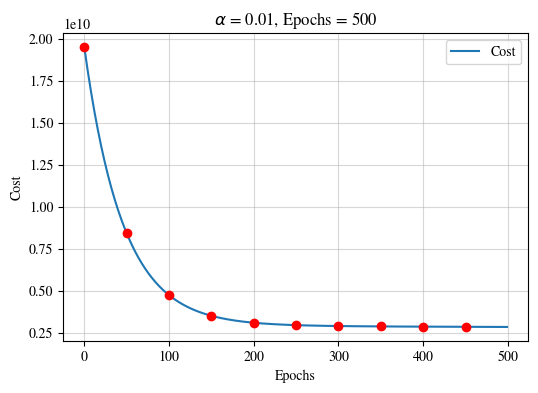

Final weights [w]: [25390.17258379 48079.2159031  43110.70478207]
Final bias [b]: [160025.61993601]


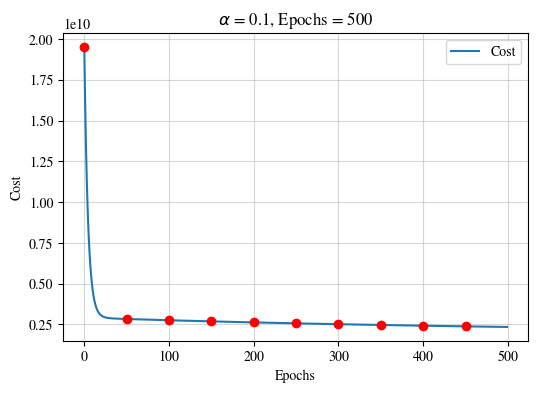

Final weights [w]: [121913.90969792  79455.48968845 145632.34770095]
Final bias [b]: [127339.45100102]


In [121]:
"""
In this task, you will use your code from the previous task. Tune the alpha hyperparameter at different values to get various plots. You will need to provide at least 3 plots. Mention the alpha value in the plot titles. Ensure all the axes are labeled appropriately. Note down the weights at the final epochs.
"""

alpha_values = [0.001, 0.01, 0.1]

for alpha in alpha_values:
    main(X_train_scaled, y_train, alpha, 500)